In [1]:
import os
import praw
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
from datetime import datetime
import seaborn as sns

In [2]:
# Carregar o modelo treinado e compilar ao mesmo tempo
model = load_model(r"..\..\modelos\modelo_rnn.h5", compile=True)  # Certifique-se de usar o caminho correto para o seu modelo


In [3]:
# Carregar o tokenizer
with open(r"..\..\modelos\tokenizer.pickle", "rb") as handle:
    tokenizer = pickle.load(handle)


In [4]:
# Função para classificar o sentimento de um texto
def classify_sentiment(text, tokenizer, model):
    # Tokenização e vetorização
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=100)
    # Prever o sentimento usando o modelo treinado
    prediction = model.predict(padded_sequence)[0][0]
    if prediction >= 0.5:
        return "Positivo"
    else:
        return "Negativo"

In [5]:
# Configurar as credenciais para acessar a API do Reddit
reddit = praw.Reddit(
    client_id="0LUIMHwzq6iTBcF4F4zGpQ",
    client_secret="AN90R4CXtXjCpEfXEEVCIKIjReY0NA",
    user_agent="aps",
)

In [6]:

# Lista de tópicos de interesse (palavras-chave)
topics = ["deforestation", "forestfires", "floods", "rain", "riverpollution"]


In [7]:
# Criar uma lista para armazenar os dados
data = []

In [9]:
# Iterar sobre cada palavra-chave
for keyword in topics:
    # Contadores para postagens positivas e negativas
    positive_count = 0
    negative_count = 0
    
    # Iterar sobre os posts do Reddit relacionados à palavra-chave
    for submission in reddit.subreddit("all").search(keyword, sort="hot", time_filter="day", limit=20):
        if submission.selftext.strip() != "" or submission.url.strip() != "":
            # Concatenar o título e o conteúdo do post
            text = submission.title + " " + submission.selftext
            # Classificar o sentimento do texto
            sentiment = classify_sentiment(text, tokenizer, model)
            # Atualizar os contadores com base no sentimento
            if sentiment == "Positivo":
                positive_count += 1
            elif sentiment == "Negativo":
                negative_count += 1
    # Calcular a porcentagem de notícias positivas e negativas
    total_count = positive_count + negative_count
    positive_percentage = (positive_count / total_count) * 100 if total_count > 0 else 0
    negative_percentage = (negative_count / total_count) * 100 if total_count > 0 else 0
    
    
     # Obter a data atual
    current_date = datetime.now().strftime("%Y-%m-%d")
    
    # Armazenar os resultados na lista de dados
    data.append([current_date, keyword, positive_percentage, negative_percentage])

# Criar um DataFrame com os dados
df = pd.DataFrame(data, columns=['Date', 'Keyword', 'Positive Percentage', 'Negative Percentage'])

# Salvar o DataFrame em um arquivo CSV
csv_file_path = r"..\..\data\reddit_sentiment_data.csv"
# Salvar o DataFrame em um arquivo CSV (modo append)
df.to_csv(csv_file_path, index=False, mode='a', header=not os.path.isfile(csv_file_path))

print("Dados salvos com sucesso no arquivo CSV.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

Script para ler o arquivo CSV após 5 dias e criar os gráficos:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [12]:
# Ler o arquivo CSV
df = pd.read_csv(r"..\..\data\reddit_sentiment_data.csv")


In [13]:
# Converter a coluna Date para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.head()


,Date,Keyword,Positive Percentage,Negative Percentage
0,2024-03-13,deforestation,71.428571,28.571429
1,2024-03-13,forestfires,0.000000,0.000000
2,2024-03-13,floods,5.000000,95.000000
3,2024-03-13,rain,25.000000,75.000000
4,2024-03-13,riverpollution,0.000000,0.000000


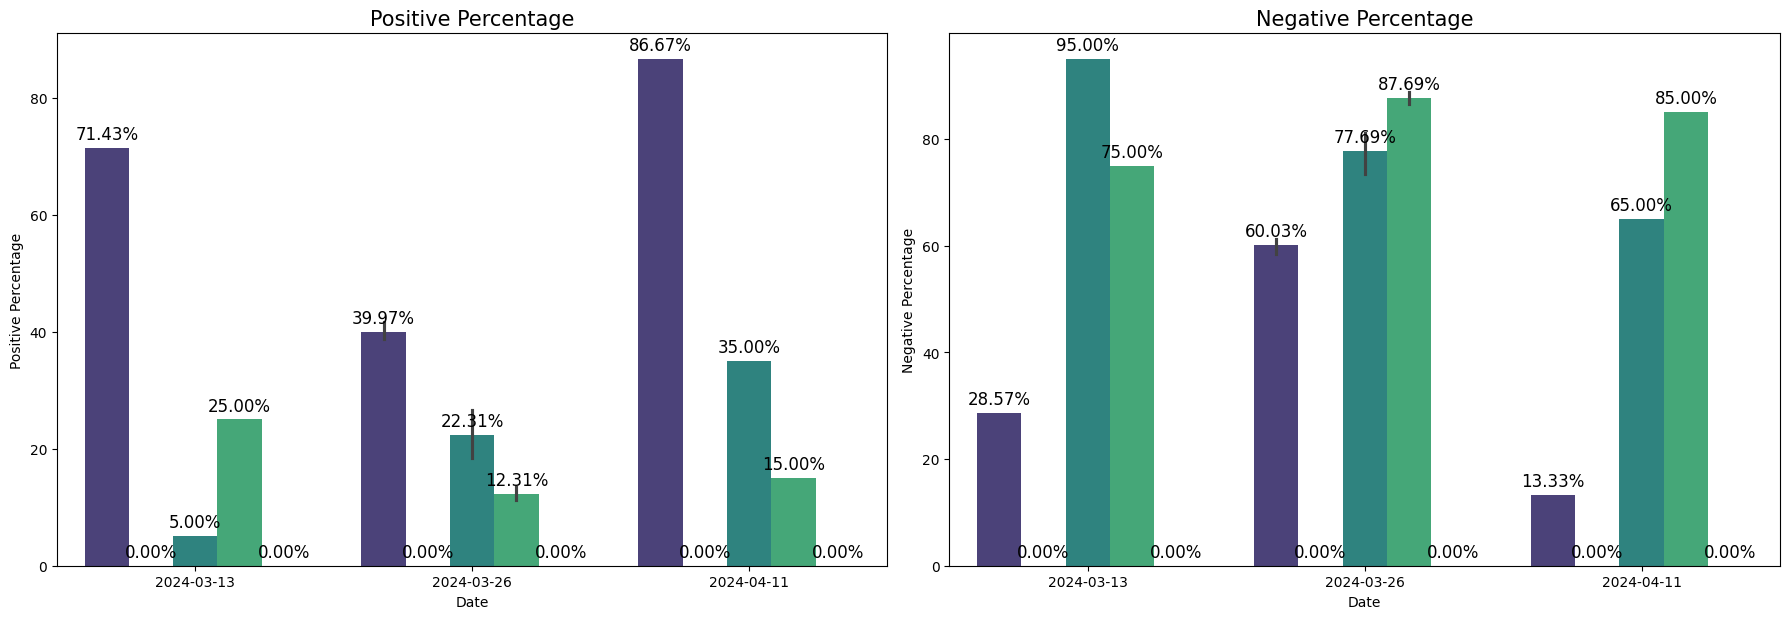

In [15]:
# Plot
# Tamanho da figura
plt.figure(figsize=(18, 30))

# Contador
A = 0

for i in df.columns.values[2:]:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.barplot(data=df.fillna('NaN'), x='Date', y=i, hue='Keyword', palette='viridis', legend=False)
    plt.title(i, fontsize=15)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
    if A >= 7:
        plt.xticks(rotation=45)

# Layout
plt.tight_layout(h_pad=2)
plt.show()
